In [5]:
# !pip install opencv-python # -- import cv2를 위해 설치

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 3.4 MB/s eta 0:00:00m eta 0:00:010:00:01


이미지 불러오기 성공 - 크기: (1668, 1668, 3)


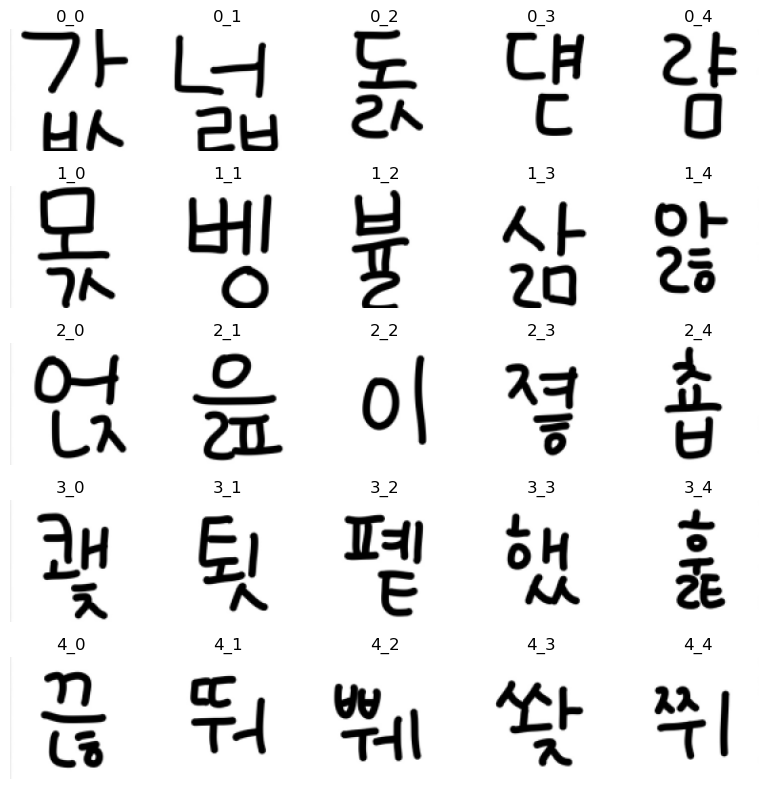

Before Zoom: {'0_0': (128, 128), '0_1': (128, 128), '0_2': (128, 128), '0_3': (128, 128), '0_4': (128, 128), '1_0': (128, 128), '1_1': (128, 128), '1_2': (128, 128), '1_3': (128, 128), '1_4': (128, 128), '2_0': (128, 128), '2_1': (128, 128), '2_2': (128, 128), '2_3': (128, 128), '2_4': (128, 128), '3_0': (128, 128), '3_1': (128, 128), '3_2': (128, 128), '3_3': (128, 128), '3_4': (128, 128), '4_0': (128, 128), '4_1': (128, 128), '4_2': (128, 128), '4_3': (128, 128), '4_4': (128, 128)}
After Zoom: {'0_0': (128, 128), '0_1': (128, 128), '0_2': (128, 128), '0_3': (128, 128), '0_4': (128, 128), '1_0': (128, 128), '1_1': (128, 128), '1_2': (128, 128), '1_3': (128, 128), '1_4': (128, 128), '2_0': (128, 128), '2_1': (128, 128), '2_2': (128, 128), '2_3': (128, 128), '2_4': (128, 128), '3_0': (128, 128), '3_1': (128, 128), '3_2': (128, 128), '3_3': (128, 128), '3_4': (128, 128), '4_0': (128, 128), '4_1': (128, 128), '4_2': (128, 128), '4_3': (128, 128), '4_4': (128, 128)}


In [56]:
import cv2
import os
import matplotlib.pyplot as plt


filename = "./data/sample.jpg"
img = cv2.imread(filename)

if img is None:
    print("이미지 불러오기 실패")
else:
    print("이미지 불러오기 성공 - 크기:", img.shape)

    # 1. 이미지 자르기
    h, w = img.shape[:2]
    rows, cols = 5, 5
    cell_height = h // rows
    cell_width = w // cols

    final_grid_dir = "cropped_img"
    os.makedirs(final_grid_dir, exist_ok=True)

    for i in range(rows):
        for j in range(cols):
            y1, y2 = i * cell_height, (i + 1) * cell_height
            x1, x2 = j * cell_width, (j + 1) * cell_width
            char_img = img[y1:y2, x1:x2]
            resized = cv2.resize(char_img, (128, 128), interpolation=cv2.INTER_AREA)
            cv2.imwrite(os.path.join(final_grid_dir, f"{i}_{j}.png"), resized)

    # 2. 중심 확대 후 resize
    zoomed_dir = "final_img"
    os.makedirs(zoomed_dir, exist_ok=True)

    image_shapes_before = {}
    resized_images = []

    for i in range(rows):
        for j in range(cols):
            path = os.path.join(final_grid_dir, f"{i}_{j}.png")
            img = cv2.imread(path)
            h, w = img.shape[:2]
            image_shapes_before[f"{i}_{j}"] = (h, w)

            zoom_ratio = 0.75
            new_h = int(h * zoom_ratio)
            new_w = int(w * zoom_ratio)
            start_y = (h - new_h) // 2
            start_x = (w - new_w) // 2
            cropped = img[start_y:start_y+new_h, start_x:start_x+new_w]

            resized = cv2.resize(cropped, (128, 128), interpolation=cv2.INTER_AREA)
            resized_images.append(resized)
            cv2.imwrite(os.path.join(zoomed_dir, f"{i}_{j}.png"), resized)

    # 3. 시각화
    fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
    image_shapes_after = {}

    for idx, ax in enumerate(axes.flat):
        i, j = divmod(idx, cols)
        img = resized_images[idx]
        h, w = img.shape[:2]
        image_shapes_after[f"{i}_{j}"] = (h, w)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.axis("off")
        ax.set_title(f"{i}_{j}")

    plt.tight_layout()
    plt.show()

    print("Before Zoom:", image_shapes_before)
    print("After Zoom:", image_shapes_after)

In [57]:
filename = "./data/model_input.png"
img = cv2.imread(filename)

if img is None:
    print("이미지 불러오기 실패")
else:
    print("이미지 불러오기 성공 - 크기:", img.shape)

이미지 불러오기 성공 - 크기: (1038, 1038, 3)
